In [ ]:
#Do decision tree, random forest, and logistic regression tomorrow 


In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt
import csv
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
mc1 = pd.read_csv('mc.csv')

In [35]:
mc1.head()

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,session,session_to,diff,diff_min
0,3,280364018,2018-06-09 00:00:00,2022-11-17 21:42:00,2018-06-09 00:00:00,2022-11-17 21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,...,PATROL BORO MAN SOUTH,18-24,WHITE HISPANIC,F,2018.0,6.0,Evening,Evening,0 days 00:01:00,1.0
1,21,310389190,2018-11-18 00:00:00,2022-11-17 16:00:00,2018-11-18 00:00:00,2022-11-17 16:10:00,48.0,11/18/2018,105,ROBBERY,...,PATROL BORO BRONX,<18,WHITE HISPANIC,M,2018.0,11.0,Afternoon,Afternoon,0 days 00:10:00,10.0
2,31,412087799,2018-05-07 00:00:00,2022-11-17 15:00:00,2018-05-19 00:00:00,2022-11-17 18:00:00,47.0,05/21/2018,361,OFF. AGNST PUB ORD SENSBLTY &,...,PATROL BORO BRONX,<18,WHITE HISPANIC,F,2018.0,5.0,Afternoon,Afternoon,0 days 03:00:00,180.0
3,33,739896840,2018-12-08 00:00:00,2022-11-17 13:00:00,2018-12-08 00:00:00,2022-11-17 13:15:00,105.0,12/08/2018,578,HARRASSMENT 2,...,PATROL BORO QUEENS SOUTH,65+,BLACK,M,2018.0,12.0,Afternoon,Afternoon,0 days 00:15:00,15.0
4,40,172284068,2018-09-18 00:00:00,2022-11-17 18:30:00,2018-09-18 00:00:00,2022-11-17 18:45:00,79.0,09/18/2018,233,SEX CRIMES,...,PATROL BORO BKLYN NORTH,18-24,BLACK,F,2018.0,9.0,Afternoon,Afternoon,0 days 00:15:00,15.0


In [36]:
mc1.nunique()

Unnamed: 0           729168
CMPLNT_NUM           729103
CMPLNT_FR_DT           4748
CMPLNT_FR_TM           1439
CMPLNT_TO_DT           5046
CMPLNT_TO_TM           1439
ADDR_PCT_CD              77
RPT_DT                 5312
KY_CD                    47
OFNS_DESC                35
PD_CD                   297
PD_DESC                 291
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         4
PREM_TYP_DESC            74
JURIS_DESC               20
JURISDICTION_CODE        20
SUSP_AGE_GROUP            5
SUSP_SEX                  3
Latitude              90070
Longitude             88462
Lat_Lon               83044
PATROL_BORO               8
VIC_AGE_GROUP             5
VIC_RACE                  7
VIC_SEX                   4
year                     13
month                    12
session                   4
session_to                4
diff                   1395
diff_min               1395
dtype: int64

In [37]:
mc1.CMPLNT_FR_DT.min()

'2007-01-01 00:00:00'

In [38]:
mc1.CMPLNT_FR_DT.max()

'2019-12-31 00:00:00'

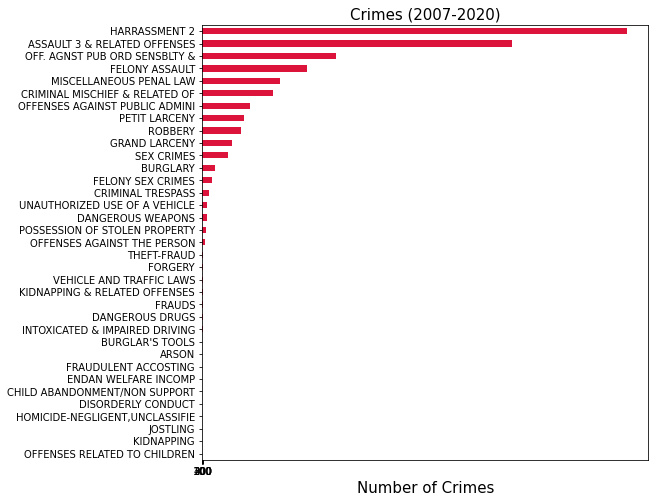

In [39]:
#plotting the crimes by # of crimes

crime_plot = plt.figure(figsize = (8, 8))
crime_plot = mc1.OFNS_DESC.value_counts().sort_values().plot(kind = 'barh', color = 'crimson')
plt.title("Crimes (2007-2020)", fontsize = 15)
plt.xlabel("Number of Crimes", fontsize = 15)
plt.xticks(np.arange(0, 500, 100))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

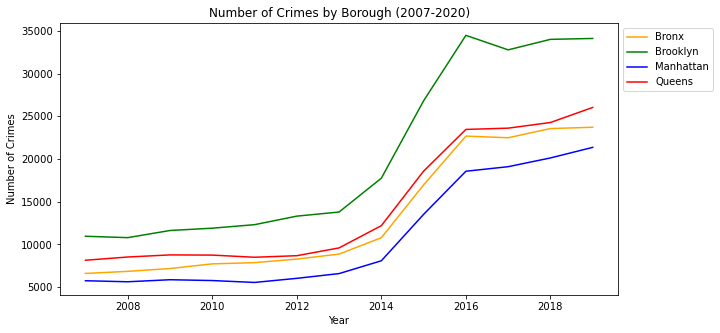

In [15]:
#crimes in borough line graph by year 

crimes_borough_year = mc1.groupby(['BORO_NM', mc1.year]).count()['OFNS_DESC']
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(crimes_borough_year.loc['BRONX'], color='orange', label='Bronx')
plt.plot(crimes_borough_year.loc['BROOKLYN'], color='green', label='Brooklyn')
plt.plot(crimes_borough_year.loc['MANHATTAN'], color='blue', label='Manhattan')
plt.plot(crimes_borough_year.loc['QUEENS'], color='red', label='Queens')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.title('Number of Crimes by Borough (2007-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

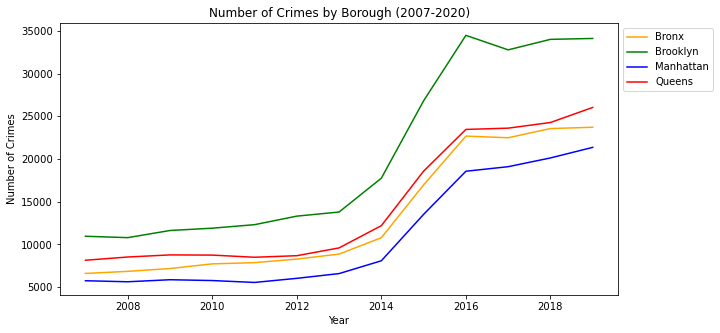

In [16]:
#crimes in borough line graph by year 

crimes_borough_year = mc1.groupby(['BORO_NM', mc1.year]).count()['CRM_ATPT_CPTD_CD']
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(crimes_borough_year.loc['BRONX'], color='orange', label='Bronx')
plt.plot(crimes_borough_year.loc['BROOKLYN'], color='green', label='Brooklyn')
plt.plot(crimes_borough_year.loc['MANHATTAN'], color='blue', label='Manhattan')
plt.plot(crimes_borough_year.loc['QUEENS'], color='red', label='Queens')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.title('Number of Crimes by Borough (2007-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show

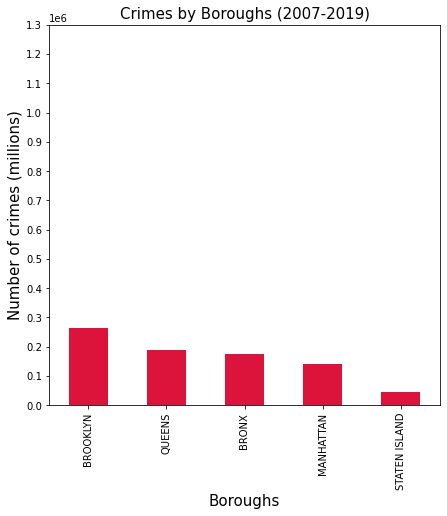

In [17]:
#crimes per borough

crime_borough = plt.figure(figsize = (7, 7))
crime_borough = mc1.BORO_NM.value_counts().plot(kind = 'bar', color = 'crimson')
plt.title("Crimes by Boroughs (2007-2019)", fontsize = 15)
plt.ylabel("Number of crimes (millions)", fontsize = 15)
plt.xlabel("Boroughs", fontsize = 15)
plt.yticks(np.arange(0, 1400000, 100000))
plt.show()

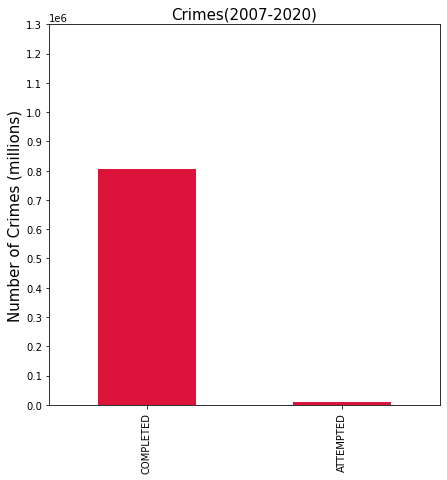

In [18]:
crime_borough = plt.figure(figsize = (7, 7))
crime_borough = mc1.CRM_ATPT_CPTD_CD.value_counts().plot(kind = 'bar', color = 'crimson')
plt.title("Crimes(2007-2020)", fontsize = 15)
plt.ylabel("Number of Crimes (millions)", fontsize = 15)
plt.xlabel("", fontsize = 15)
plt.yticks(np.arange(0, 1400000, 100000))
plt.show()

array([<AxesSubplot:title={'center':'CRM_ATPT_CPTD_CD'}, xlabel='BORO_NM,CRM_ATPT_CPTD_CD'>],
      dtype=object)

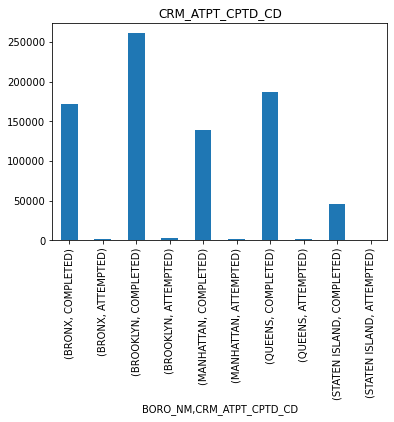

In [19]:
mc1.groupby('BORO_NM')['CRM_ATPT_CPTD_CD'].value_counts().plot(subplots = True, kind ='bar')

In [20]:
#too long to run 

mc1.groupby('CMPLNT_FR_DT')['OFNS_DESC'].value_counts().plot(subplots = True, kind ='bar')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa3f927fd30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
mc1.groupby('')['OFNS_DESC'].value_counts().plot(subplots = True, kind ='bar')

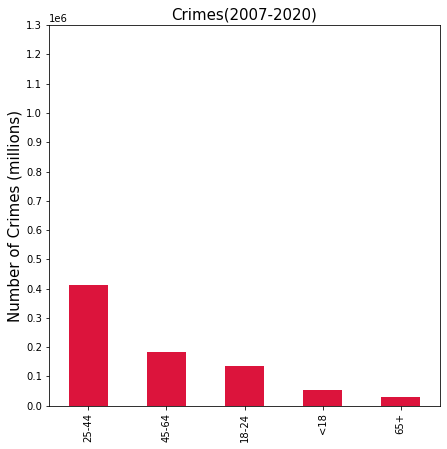

In [21]:
crime_borough = plt.figure(figsize = (7, 7))
crime_borough = mc1.VIC_AGE_GROUP.value_counts().plot(kind = 'bar', color = 'crimson')
plt.title("Crimes(2007-2020)", fontsize = 15)
plt.ylabel("Number of Crimes (millions)", fontsize = 15)
plt.xlabel("", fontsize = 15)
plt.yticks(np.arange(0, 1400000, 100000))
plt.show()

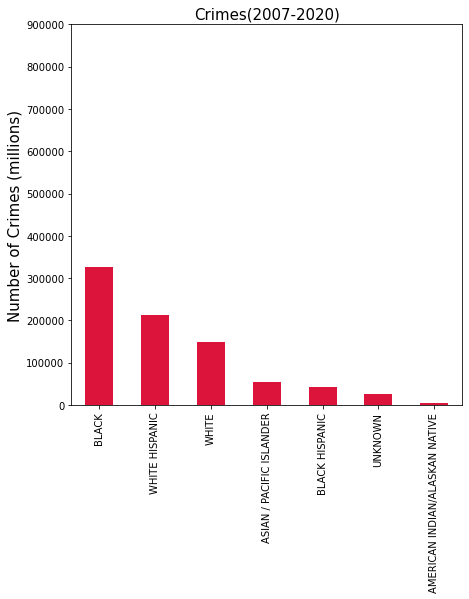

In [22]:
crime_borough = plt.figure(figsize = (7, 7))
crime_borough = mc1.VIC_RACE.value_counts().plot(kind = 'bar', color = 'crimson')
plt.title("Crimes(2007-2020)", fontsize = 15)
plt.ylabel("Number of Crimes (millions)", fontsize = 15)
plt.xlabel("", fontsize = 15)
plt.yticks(np.arange(0, 1000000, 100000))
plt.show()

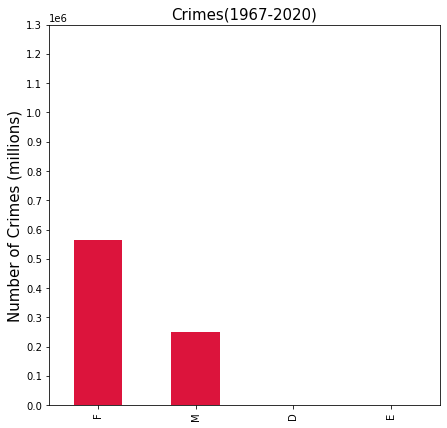

In [23]:
crime_borough = plt.figure(figsize = (7, 7))
crime_borough = mc1.VIC_SEX.value_counts().plot(kind = 'bar', color = 'crimson')
plt.title("Crimes(1967-2020)", fontsize = 15)
plt.ylabel("Number of Crimes (millions)", fontsize = 15)
plt.xlabel("", fontsize = 15)
plt.yticks(np.arange(0, 1400000, 100000))
plt.show()

array([<AxesSubplot:title={'center':'OFNS_DESC'}, xlabel='VIC_SEX,OFNS_DESC'>],
      dtype=object)

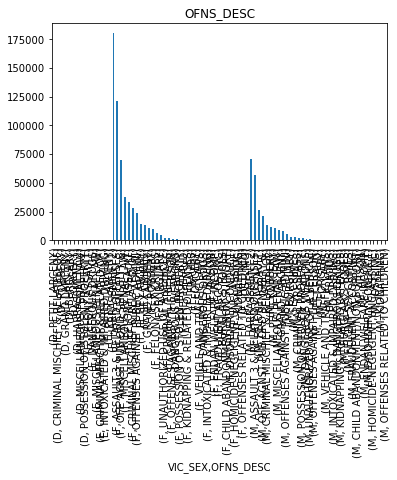

In [24]:
mc1.groupby('VIC_SEX')['OFNS_DESC'].value_counts().plot(subplots = True, kind ='bar')

array([<AxesSubplot:title={'center':'OFNS_DESC'}, xlabel='VIC_RACE,OFNS_DESC'>],
      dtype=object)

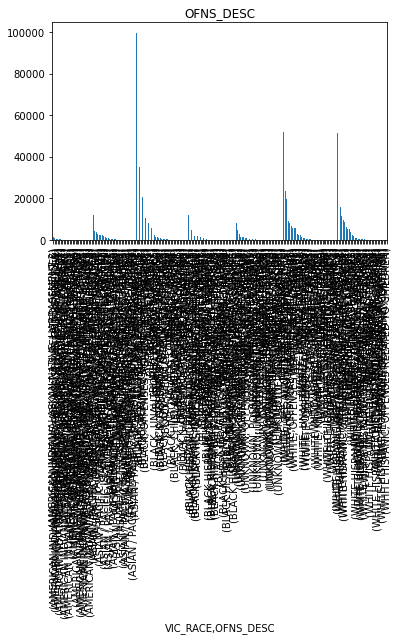

In [25]:
mc1.groupby('VIC_RACE')['OFNS_DESC'].value_counts().plot(subplots = True, kind ='bar')

In [32]:
mc1.to_csv('mc1.csv')